In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('H:\My Drive\LEARNING\Datasets\card_transdata.csv')
df.shape

(1000000, 8)

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [5]:
df.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [6]:
def check_duplicate_null(df):
    duplicate = df.duplicated().sum()
    null = df.isna().sum()
    if duplicate == 0:
        print("No duplicates!")
    else:
        print(duplicate)
    for i in null:
        if i !=0:
            i=i+1
    if i == 0:
        print("No null values!")
    else: 
        print("There are ",i," Null Values!")
check_duplicate_null(df)

No duplicates!
No null values!


In [7]:
check_duplicate_null(df)

No duplicates!
No null values!


In [8]:
df.shape

(1000000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [10]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [12]:
X = df.iloc[:, df.columns!='fraud'] #dependent variables 
Y = df['fraud'] #target variable

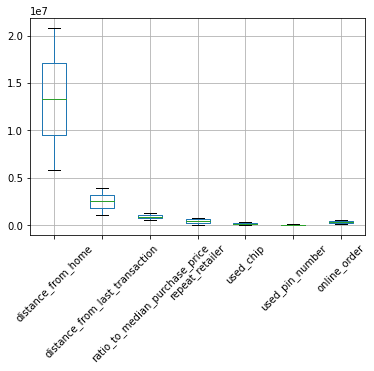

In [13]:
import matplotlib.pyplot as plt
df_fraud = df.groupby('fraud').sum()
df_fraud.boxplot()
plt.xticks(rotation=45)
plt.show()

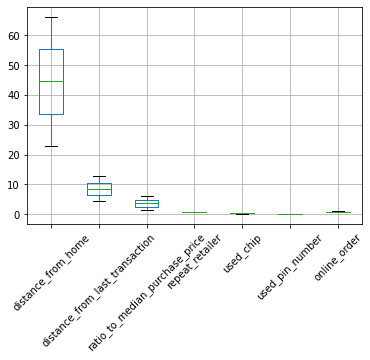

In [14]:
import matplotlib.pyplot as plt
df_fraud = df.groupby('fraud').mean()
df_fraud.boxplot()
plt.xticks(rotation=45)
plt.show()

In [15]:
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [16]:
legit = df[df['fraud']==0] 
fraud = df[df['fraud']==1]

In [17]:
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


In [18]:
print(legit.shape, fraud.shape)

(912597, 8) (87403, 8)


In [19]:
legit_sample=legit.sample(n=87403)

In [20]:
legit_sample.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
3861,14.521913,0.172865,1.134269,1.0,1.0,0.0,0.0,0.0
936344,6.156936,16.429535,3.771479,1.0,0.0,0.0,1.0,0.0
580599,2.270601,0.737378,0.226104,1.0,1.0,0.0,1.0,0.0
809940,7.186105,0.715933,0.131113,1.0,1.0,0.0,0.0,0.0
451743,3.422995,1.285574,0.326677,1.0,0.0,0.0,1.0,0.0


In [21]:
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [22]:
new_df = pd.concat([legit_sample, fraud], axis=0)
new_df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0
999949,15.724799,1.875906,11.009366,1.0,1.0,0.0,1.0,1.0


In [23]:
new_df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0.0,22.487420,4.166676,1.422077,0.881045,0.357253,0.109493,0.625001
1.0,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


In [24]:
X = new_df.drop(columns='fraud')
Y = new_df['fraud']

In [49]:
new_df.head()
new_df.shape

(174806, 8)

In [64]:
q1 = new_df.distance_from_home.quantile(0.001)
q3 = new_df.distance_from_home.quantile(0.999)
print(q1, q3)

0.12786317756509252 1137.9052965319433


In [65]:
IQR = q1 - q3
IQR

-1137.7774333543782

In [66]:
lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR
print(lower_limit, upper_limit)

1706.7940132091323 -568.7608534996239


In [70]:
new_df_outliers = new_df[(new_df.distance_from_home<lower_limit)&(new_df.distance_from_home>upper_limit)]

In [72]:
new_df_outliers.shape

(174751, 8)

In [73]:
new_df.shape

(174806, 8)